## ANÁLISE DE CASOS DE DENGUE E CHIKUNGUNYA

#### ÍNDICE

- [1. INTRODUÇÃO](#introducao)
- [2. IMPORTANDO BIBLIOTECAS](#bibliotecas)
- [3. DATASET](#dataset)
  - [3.1 DICIONÁRIO](#dicionario)
  - [3.2 DIVISÃO DO DATASET EM TREINO E TESTE](#treinoteste)
  - [3.3 TRATAMENTO DO DATASET](#tratamento)
- [4. ANÁLISE DESCRITIVA](#descritiva)
- [5. MODELAGEM](#modelagem)
  - [5.1 ÁRVORE DE DECISÃO](#arvore)
  - [5.2 REGRESSÃO LOGÍSTICA](#reglog)
- [6. CONCLUSÃO](#conclusao)

#### 1. INTRODUÇÃO <a name="introducao"></a>

No Brasil, as arboviroses dengue e a chikungunya representam sérios problemas de saúde pública. Transmitidas pelo mesmo vetor, o mosquito *Aedes aegypti*, essas doenças são endêmicas em muitas regiões do país. <br>
A dengue apresenta sintomas como febre alta, dores musculares, dor de cabeça e pode causar hemorragias, tornando-se potencialmente fatal. A chikungunya, que tem visto um aumento nos casos nos últimos anos, pode apresentar sintomas semelhantes à dengue, como a febre alta e dor de cabeça, mas também dores articulares intensas, fadiga e erupção cutânea.

Diante desse cenário, o desenvolvimento e implementação de modelos de diagnóstico para essas doenças podem trazer muitos benefícios, como:
- um diagnóstico mais rápido e de um grande número de pacientes de uma vez;
- alertas antecipados às comunidades e profissionais de saúde sobre o aumento esperado de casos, permitindo uma preparação adequada para lidar com a situação; 
- locação eficiente de recursos de saúde, direcionando-os para áreas onde há maior probabilidade de surtos.

Para desenvolver esses modelos, algoritmos de Machine Learning podem ser treinados para identificar padrões nos sintomas dos pacientes, auxiliando os profissionais de saúde no diagnóstico precoce e preciso.

#### 2. IMPORTANDO BIBLIOTECAS <a name="bibliotecas"></a>

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import graphviz
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')

#### 3. DATASET <a name="dataset"></a>

- Este conjunto de dados apresenta informações clínicas e sociodemográficas de pacientes confirmados com Dengue e Chikungunya, bem como casos descartados dessas mesmas doenças. Os dados foram obtidos de dois bancos de dados: o primeiro é do Sistema de Informação de Agravos de Notificação (SINAN), que ocorreu no estado do Amazonas, de 2015 a 2020; o segundo é do Dados Recife, um portal de dados abertos da cidade do Recife, no estado de Pernambuco, também de 2015 a 2020.
- Fonte: [Mendeley Data](https://data.mendeley.com/datasets/bv26kznkjs/1)

#### 3.1 DICIONÁRIO <a name="dicionario"></a>

|Nome da coluna | Descrição                                  | Valores                                            |
|:--------------|:-------------------------------------------|:---------------------------------------------------|
|NU_IDADE_N     | Idade                                      | Ordem de magnitude definida de acordo com o 1o dígito:<br> 1. Hora<br> 2. Dia<br> 3. Mês<br> 4. Ano
|CS_SEXO        | Sexo                                       |0 Masculino <br>1 Feminino                        |
|CS_GESTANT     |Idade gestacional no caso de ser uma mulher |1. 1o trimestre<br>2. 2o trimestre<br>3. 3o trimestre<br>4. Idade gestacional ignorada<br>5. Não<br>6. Não se aplica<br>9. Ignorado |
|CS_RACA        | Raça do paciente                           |1. Branco<br>2. Negro<br>3. Amarelo<br>4. Pardo<br> 5. Indígena<br>9. Ignorado. |
|CS_ZONA        | Área da residência                         |1. Urbana<br>2. Rural<br>3. Periurbana<br>9. Ignorado|
|FEBRE          | Sintoma - Febre                            |1. Sim<br>2. Não                                   |
|MIALGIA        | Sintoma - Mialgia - dor muscular           |1. Sim<br>2. Não                                   |
|CEFALEIA       | Sintoma - Cefaleia - dor de cabeça         |1. Sim<br>2. Não                                   |
|EXANTEMA       | Sintoma - Exantema - manchas/erupções cutâneas |1. Sim<br>2. Não                               |
|VOMITO         | Sintoma - Vômito                           |1. Sim<br>2. Não                                   |
|NAUSEA         | Sintoma - Nausea                           |1. Sim<br>2. Não                                   |
|DOR_COSTAS     | Sintoma - Dor nas costas                   |1. Sim<br>2. Não                                   |
|CONJUNTVIT     | Sintoma - Conjuntivite                     |1. Sim<br>2. Não                                   |
|ARTRITE        | Sintoma - Artrite                          |1. Sim<br>2. Não                                   |
|ARTRALGIA      | Sintoma - Dor nas articulações             |1. Sim<br>2. Não                                   |
|PETEQUIA       | Sintoma - Pequenos hematomas               |1. Sim<br>2. Não                                   |
|LACO           | Sintoma - Teste do torniquete (avalia fragilidade dos capilares)  |1. Sim<br>2. Não            |
|DOR_RETRO      | Sintoma - Dor retroorbital                 |1. Sim<br>2. Não                                   |
|DIABETES       | Doença pré-existente - diabetes            |1. Sim<br>2. Não                                   |
|HEMATOLOG      | Doença hematológica pré-existente          |1. Sim<br>2. Não                                   |
|HEPATOPAT      | Doença hepática pré-existente              |1. Sim<br>2. Não                                   |
|RENAL          | Doença renal pré-existente                 |1. Sim<br>2. Não                                   |
|HIPERTENSA     | Doença pré-existente - hipertensão         |1. Sim<br>2. Não                                   |
|ACIDO_PEPT     | Doença pré-existente - gastrite/úlcera     |1. Sim<br>2. Não                                   |
|AUTO_IMUNE     | Doença autoimune pré-existente             |1. Sim<br>2. Não                                   |
|DIAS           | No de dias com sintomas                    |                                                   |
|CLASSI_FIN     | Classificação do paciente                  |Chikungunya<br>Dengue<br>Outras doenças            |



In [45]:
df = pd.read_csv('data/data set.csv', encoding='UTF-8', sep=';')
df.head()

NU_IDADE_N  CS_SEXO  CS_GESTANT  CS_RACA  CS_ZONA  FEBRE  MIALGIA  \
0      4022.0        0         5.0      1.0      3.0    1.0      1.0   
1      4020.0        1         6.0      4.0      1.0    1.0      1.0   
2      4061.0        0         6.0      4.0      1.0    1.0      1.0   
3      4046.0        1         6.0      4.0      1.0    1.0      1.0   
4      4014.0        1         6.0      4.0      1.0    1.0      1.0   

   CEFALEIA  EXANTEMA  VOMITO  ...  DOR_RETRO  DIABETES  HEMATOLOG  HEPATOPAT  \
0       1.0       2.0     2.0  ...        1.0       2.0        2.0        2.0   
1       1.0       2.0     2.0  ...        2.0       2.0        2.0        2.0   
2       1.0       2.0     2.0  ...        2.0       2.0        2.0        2.0   
3       1.0       2.0     2.0  ...        2.0       2.0        2.0        2.0   
4       1.0       2.0     1.0  ...        1.0       2.0        2.0        2.0   

   RENAL  HIPERTENSA  ACIDO_PEPT  AUTO_IMUNE  DIAS   CLASSI_FIN  
0    2.0         2.0         2.0         2.0     1  CHIKUNGUNYA  
1    2.0         2.0         2.0         2.0     6  CHIKUNGUNYA  
2    2.0         2.0         2.0         2.0    32  CHIKUNGUNYA  
3    2.0         2.0         2.0         2.0     2  CHIKUNGUNYA  
4    2.0         2.0         2.0         2.0     2  CHIKUNGUNYA  

[5 rows x 27 columns]

In [46]:
print(f'O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataset tem 17172 linhas e 27 colunas.


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17172 entries, 0 to 17171
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NU_IDADE_N  17172 non-null  float64
 1   CS_SEXO     17172 non-null  int64  
 2   CS_GESTANT  17172 non-null  float64
 3   CS_RACA     17172 non-null  float64
 4   CS_ZONA     17172 non-null  float64
 5   FEBRE       17172 non-null  float64
 6   MIALGIA     17172 non-null  float64
 7   CEFALEIA    17172 non-null  float64
 8   EXANTEMA    17172 non-null  float64
 9   VOMITO      17172 non-null  float64
 10  NAUSEA      17172 non-null  float64
 11  DOR_COSTAS  17172 non-null  float64
 12  CONJUNTVIT  17172 non-null  float64
 13  ARTRITE     17172 non-null  float64
 14  ARTRALGIA   17172 non-null  float64
 15  PETEQUIA_N  17172 non-null  float64
 16  LACO        17172 non-null  float64
 17  DOR_RETRO   17172 non-null  float64
 18  DIABETES    17172 non-null  float64
 19  HEMATOLOG   17172 non-nul

In [6]:
#verificando dados faltantes
df.isnull().sum()

NU_IDADE_N    0
CS_SEXO       0
CS_GESTANT    0
CS_RACA       0
CS_ZONA       0
FEBRE         0
MIALGIA       0
CEFALEIA      0
EXANTEMA      0
VOMITO        0
NAUSEA        0
DOR_COSTAS    0
CONJUNTVIT    0
ARTRITE       0
ARTRALGIA     0
PETEQUIA_N    0
LACO          0
DOR_RETRO     0
DIABETES      0
HEMATOLOG     0
HEPATOPAT     0
RENAL         0
HIPERTENSA    0
ACIDO_PEPT    0
AUTO_IMUNE    0
DIAS          0
CLASSI_FIN    0
dtype: int64

#### 3.2 DIVISÃO DO DATASET EM TREINO E TESTE <a name="treinoteste"></a>

In [48]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=100)

print(f'''

A base de treino tem {df_train.shape[0]} linhas e {df_train.shape[1]} colunas.
A base de teste tem {df_test.shape[0]} linhas e {df_test.shape[1]} colunas.

''')



A base de treino tem 12879 linhas e 27 colunas.
A base de teste tem 4293 linhas e 27 colunas.




In [49]:
df_train = df_train.reset_index()
df_train = df_train.drop(columns=['index'])
df_train.head()

NU_IDADE_N  CS_SEXO  CS_GESTANT  CS_RACA  CS_ZONA  FEBRE  MIALGIA  \
0      4006.0        0         6.0      4.0      1.0    1.0      2.0   
1      4001.0        0         6.0      9.0      1.0    1.0      2.0   
2      4019.0        0         9.0      9.0      1.0    1.0      2.0   
3      4054.0        0         5.0      4.0      1.0    1.0      1.0   
4      4010.0        1         6.0      4.0      2.0    1.0      2.0   

   CEFALEIA  EXANTEMA  VOMITO  ...  DOR_RETRO  DIABETES  HEMATOLOG  HEPATOPAT  \
0       1.0       1.0     2.0  ...        2.0       2.0        2.0        2.0   
1       2.0       1.0     1.0  ...        2.0       2.0        2.0        2.0   
2       1.0       2.0     2.0  ...        2.0       2.0        2.0        2.0   
3       1.0       1.0     1.0  ...        2.0       2.0        2.0        2.0   
4       2.0       1.0     2.0  ...        2.0       2.0        2.0        2.0   

   RENAL  HIPERTENSA  ACIDO_PEPT  AUTO_IMUNE  DIAS      CLASSI_FIN  
0    2.0         2.0         2.0         2.0     4          DENGUE  
1    2.0         2.0         2.0         2.0    10  OUTRAS_DOENCAS  
2    2.0         2.0         2.0         2.0   384     CHIKUNGUNYA  
3    2.0         2.0         1.0         2.0     3          DENGUE  
4    2.0         2.0         2.0         2.0     3  OUTRAS_DOENCAS  

[5 rows x 27 columns]

In [50]:
df_test = df_test.reset_index()
df_test = df_test.drop(columns=['index'])
df_test.head()

NU_IDADE_N  CS_SEXO  CS_GESTANT  CS_RACA  CS_ZONA  FEBRE  MIALGIA  \
0      4042.0        1         6.0      4.0      9.0    1.0      1.0   
1      4011.0        1         6.0      4.0      1.0    1.0      2.0   
2      4037.0        0         5.0      9.0      1.0    1.0      1.0   
3      4035.0        1         6.0      9.0      9.0    1.0      1.0   
4      4031.0        0         9.0      9.0      1.0    1.0      1.0   

   CEFALEIA  EXANTEMA  VOMITO  ...  DOR_RETRO  DIABETES  HEMATOLOG  HEPATOPAT  \
0       1.0       2.0     2.0  ...        1.0       2.0        2.0        2.0   
1       2.0       2.0     2.0  ...        2.0       2.0        2.0        2.0   
2       1.0       2.0     2.0  ...        2.0       2.0        2.0        2.0   
3       1.0       2.0     2.0  ...        2.0       2.0        2.0        2.0   
4       1.0       2.0     2.0  ...        2.0       2.0        2.0        2.0   

   RENAL  HIPERTENSA  ACIDO_PEPT  AUTO_IMUNE  DIAS      CLASSI_FIN  
0    2.0         2.0         2.0         2.0     1     CHIKUNGUNYA  
1    2.0         2.0         2.0         2.0     5     CHIKUNGUNYA  
2    2.0         2.0         2.0         2.0     0     CHIKUNGUNYA  
3    2.0         2.0         2.0         2.0     0  OUTRAS_DOENCAS  
4    2.0         2.0         2.0         2.0    12  OUTRAS_DOENCAS  

[5 rows x 27 columns]

#### 3.3 TRATAMENTO DO DATASET <a name="tratamento"></a>

In [51]:
cols_sintomas = ['FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS',
                'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LACO', 'DOR_RETRO', 'DIABETES', 
                'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE']

In [52]:
#trocando o 1 e 2 por 0 (não tem o sintoma/doença) e 1 (apresenta o sintoma/doença)
for col in cols_sintomas:
    df_train[col] = df_train[col].map({1.0: 1, 2.0: 0})

In [53]:
df_train.head()

NU_IDADE_N  CS_SEXO  CS_GESTANT  CS_RACA  CS_ZONA  FEBRE  MIALGIA  \
0      4006.0        0         6.0      4.0      1.0      1        0   
1      4001.0        0         6.0      9.0      1.0      1        0   
2      4019.0        0         9.0      9.0      1.0      1        0   
3      4054.0        0         5.0      4.0      1.0      1        1   
4      4010.0        1         6.0      4.0      2.0      1        0   

   CEFALEIA  EXANTEMA  VOMITO  ...  DOR_RETRO  DIABETES  HEMATOLOG  HEPATOPAT  \
0         1         1       0  ...          0         0          0          0   
1         0         1       1  ...          0         0          0          0   
2         1         0       0  ...          0         0          0          0   
3         1         1       1  ...          0         0          0          0   
4         0         1       0  ...          0         0          0          0   

   RENAL  HIPERTENSA  ACIDO_PEPT  AUTO_IMUNE  DIAS      CLASSI_FIN  
0      0           0           0           0     4          DENGUE  
1      0           0           0           0    10  OUTRAS_DOENCAS  
2      0           0           0           0   384     CHIKUNGUNYA  
3      0           0           1           0     3          DENGUE  
4      0           0           0           0     3  OUTRAS_DOENCAS  

[5 rows x 27 columns]

In [54]:
cols_tipo = ['NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ZONA', 'FEBRE',
             'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS',
             'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LACO', 'DOR_RETRO',
             'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA',
             'ACIDO_PEPT', 'AUTO_IMUNE', 'DIAS']

#trocando variáveis para int64

df_train[cols_tipo] = df_train[cols_tipo].astype('int64')

In [55]:
df_train.dtypes

NU_IDADE_N     int64
CS_SEXO        int64
CS_GESTANT     int64
CS_RACA        int64
CS_ZONA        int64
FEBRE          int64
MIALGIA        int64
CEFALEIA       int64
EXANTEMA       int64
VOMITO         int64
NAUSEA         int64
DOR_COSTAS     int64
CONJUNTVIT     int64
ARTRITE        int64
ARTRALGIA      int64
PETEQUIA_N     int64
LACO           int64
DOR_RETRO      int64
DIABETES       int64
HEMATOLOG      int64
HEPATOPAT      int64
RENAL          int64
HIPERTENSA     int64
ACIDO_PEPT     int64
AUTO_IMUNE     int64
DIAS           int64
CLASSI_FIN    object
dtype: object

In [56]:
#verificando valores únicos das colunas
for col in df_train.columns:
    valores = df_train[col].value_counts()
    print(f'''
    {col}: {valores}
    ---------------''')


    NU_IDADE_N: NU_IDADE_N
4024    263
4021    258
4022    255
4026    252
4031    244
       ... 
2024      1
2020      1
2025      1
4106      1
2029      1
Name: count, Length: 133, dtype: int64
    ---------------

    CS_SEXO: CS_SEXO
0    7369
1    5495
2      15
Name: count, dtype: int64
    ---------------

    CS_GESTANT: CS_GESTANT
6    7151
5    2848
9    2709
2      60
3      56
1      37
4      15
0       3
Name: count, dtype: int64
    ---------------

    CS_RACA: CS_RACA
9    8052
4    3961
1     523
5     138
2     116
0      61
3      28
Name: count, dtype: int64
    ---------------

    CS_ZONA: CS_ZONA
1    11022
9     1726
2      128
3        3
Name: count, dtype: int64
    ---------------

    FEBRE: FEBRE
1    10961
0     1918
Name: count, dtype: int64
    ---------------

    MIALGIA: MIALGIA
1    7523
0    5356
Name: count, dtype: int64
    ---------------

    CEFALEIA: CEFALEIA
1    7775
0    5104
Name: count, dtype: int64
    ---------------

    EXANTEMA: 

- Algumas colunas apresentam números que não estão no dicionário; possivelmente ocorreram erros de digitação. 
- Como são poucas linhas, serão trocadas pelo valor mais frequente.

In [59]:
df_train['CS_SEXO'] = df_train['CS_SEXO'].map({1:1, 0:0, 2:0})
df_train['CS_SEXO'].value_counts()

CS_SEXO
0    7384
1    5495
Name: count, dtype: int64

In [60]:
df_train['CS_GESTANT'] = df_train['CS_GESTANT'].map({1:1, 0:6, 2:2, 3:3, 4:4, 5:5, 6:6, 9:9})
df_train['CS_GESTANT'].value_counts()

CS_GESTANT
6    7154
5    2848
9    2709
2      60
3      56
1      37
4      15
Name: count, dtype: int64

In [61]:
df_train['CS_RACA'] = df_train['CS_RACA'].map({1:1, 0:9, 2:2, 3:3, 4:4, 5:5, 9:9})
df_train['CS_RACA'].value_counts()

CS_RACA
9    8113
4    3961
1     523
5     138
2     116
3      28
Name: count, dtype: int64

In [62]:
df_train['NU_IDADE_N'] = df_train['NU_IDADE_N'].astype('str') #mudando tipo para filtrar 

# Função para filtrar e extrair os dois últimos dígitos da coluna idade
def extrair_idade(row):
    idade = row['NU_IDADE_N']
    # Filtrando pelo primeiro dígito
    tipo = idade[0]
    # Extraindo apenas os dois últimos dígitos
    idade = idade[2:]
    return tipo, idade

df_train[['tipo', 'idade']] = df_train.apply(lambda row: extrair_idade(row), axis=1, result_type="expand")

In [63]:
df_train.head()

NU_IDADE_N  CS_SEXO  CS_GESTANT  CS_RACA  CS_ZONA  FEBRE  MIALGIA  CEFALEIA  \
0       4006        0           6        4        1      1        0         1   
1       4001        0           6        9        1      1        0         0   
2       4019        0           9        9        1      1        0         1   
3       4054        0           5        4        1      1        1         1   
4       4010        1           6        4        2      1        0         0   

   EXANTEMA  VOMITO  ...  HEMATOLOG  HEPATOPAT  RENAL  HIPERTENSA  ACIDO_PEPT  \
0         1       0  ...          0          0      0           0           0   
1         1       1  ...          0          0      0           0           0   
2         0       0  ...          0          0      0           0           0   
3         1       1  ...          0          0      0           0           1   
4         1       0  ...          0          0      0           0           0   

   AUTO_IMUNE  DIAS      CLASSI_FIN  tipo  idade  
0           0     4          DENGUE     4     06  
1           0    10  OUTRAS_DOENCAS     4     01  
2           0   384     CHIKUNGUNYA     4     19  
3           0     3          DENGUE     4     54  
4           0     3  OUTRAS_DOENCAS     4     10  

[5 rows x 29 columns]

In [64]:
df_train['tipo'].value_counts()

tipo
4    12524
3      237
2      118
Name: count, dtype: int64

In [66]:
#passando idades dos tipos 1, 2 e 3 para 0, pois esses pacientes têm menos de 1 ano e assim a coluna 'idade' fica padronizada em anos
df_train.loc[df_train['tipo'] != '4', 'idade'] = '0'

In [67]:
df_train['DIAS'].value_counts().sort_index()

DIAS
-333      1
-323      1
-319      1
-314      1
-293      1
         ..
 938      1
 1465     1
 2853     1
 5814     1
 23697    1
Name: count, Length: 355, dtype: int64

- A colunas `DIAS` parece mostrar valores que não fazem sentido. 
- O dataset vai de 2015 a 2020. Se considerarmos 5 anos, são cerca de 1830 dias. Os valores maiores que esse serão modificados para a média da coluna. 
- Valores negativos também serão modificados para a média da coluna. 

In [70]:
df_train.loc[df_train['DIAS'] > 1830, 'DIAS'] = df_train['DIAS'].mean()
df_train.loc[df_train['DIAS'] < 0, 'DIAS'] = df_train['DIAS'].mean()

<Axes: xlabel='CLASSI_FIN', ylabel='DIAS'>

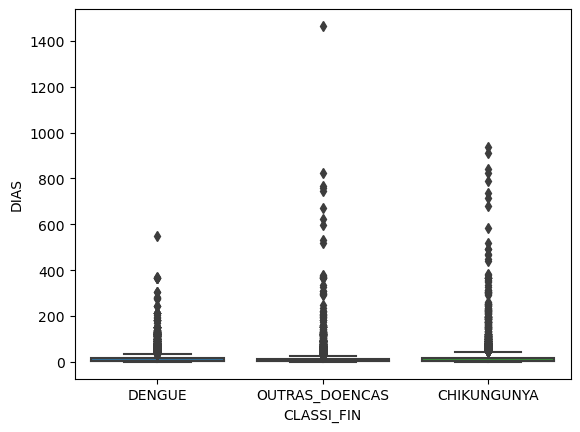

In [71]:
#verificando outliers em DIAS
sns.boxplot(data=df_train, x='CLASSI_FIN', y='DIAS')

In [72]:
dias = df_train['DIAS']

# Valores do quartil 25 e quartil 75
q25, q75 = np.percentile(dias, 25), np.percentile(dias, 75)
print('QUARTIL 25: {} | QUARTIL 75: {}'.format(q25, q75))

# Interquartile range
dias_iqr = q75 - q25
print('IQR: ', dias_iqr)

# Limiar
dias_limiar = dias_iqr * 1.5

# Limite superior e inferior
dias_lower, dias_upper = q25 - dias_limiar, q75 + dias_limiar

print('LIMIAR: ', dias_limiar)
print('DIAS limite INFERIOR', dias_lower)
print('DIAS limite SUPERIOR', dias_upper)

# Ouliers (fora os limites estabelecidos anteriormente)
outliers = [x for x in dias if x < dias_lower or x > dias_upper]
print('Quantidade de outliers em DIAS:', len(outliers))

df_dias = df_train.drop(df_train[(df_train['DIAS'] > dias_upper) | (df_train['DIAS'] < dias_lower)].index)

QUARTIL 25: 2.0 | QUARTIL 75: 16.0
IQR:  14.0
LIMIAR:  21.0
DIAS limite INFERIOR -19.0
DIAS limite SUPERIOR 37.0
Quantidade de outliers em DIAS: 1557


In [73]:
df_dias.shape

(11322, 29)

<Axes: xlabel='CLASSI_FIN', ylabel='DIAS'>

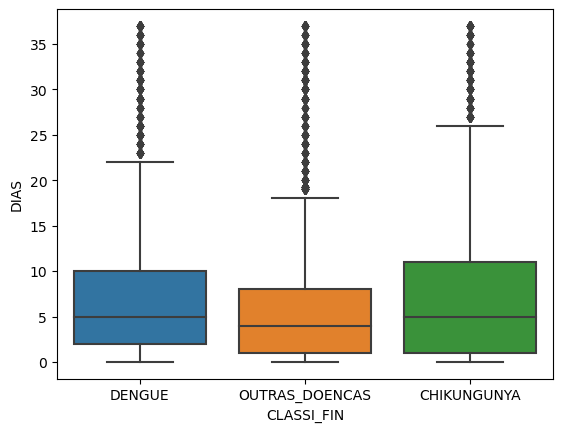

In [74]:
sns.boxplot(data=df_dias, x='CLASSI_FIN', y='DIAS')

#### 4. ANÁLISE DESCRITIVA <a name="descritiva"></a>

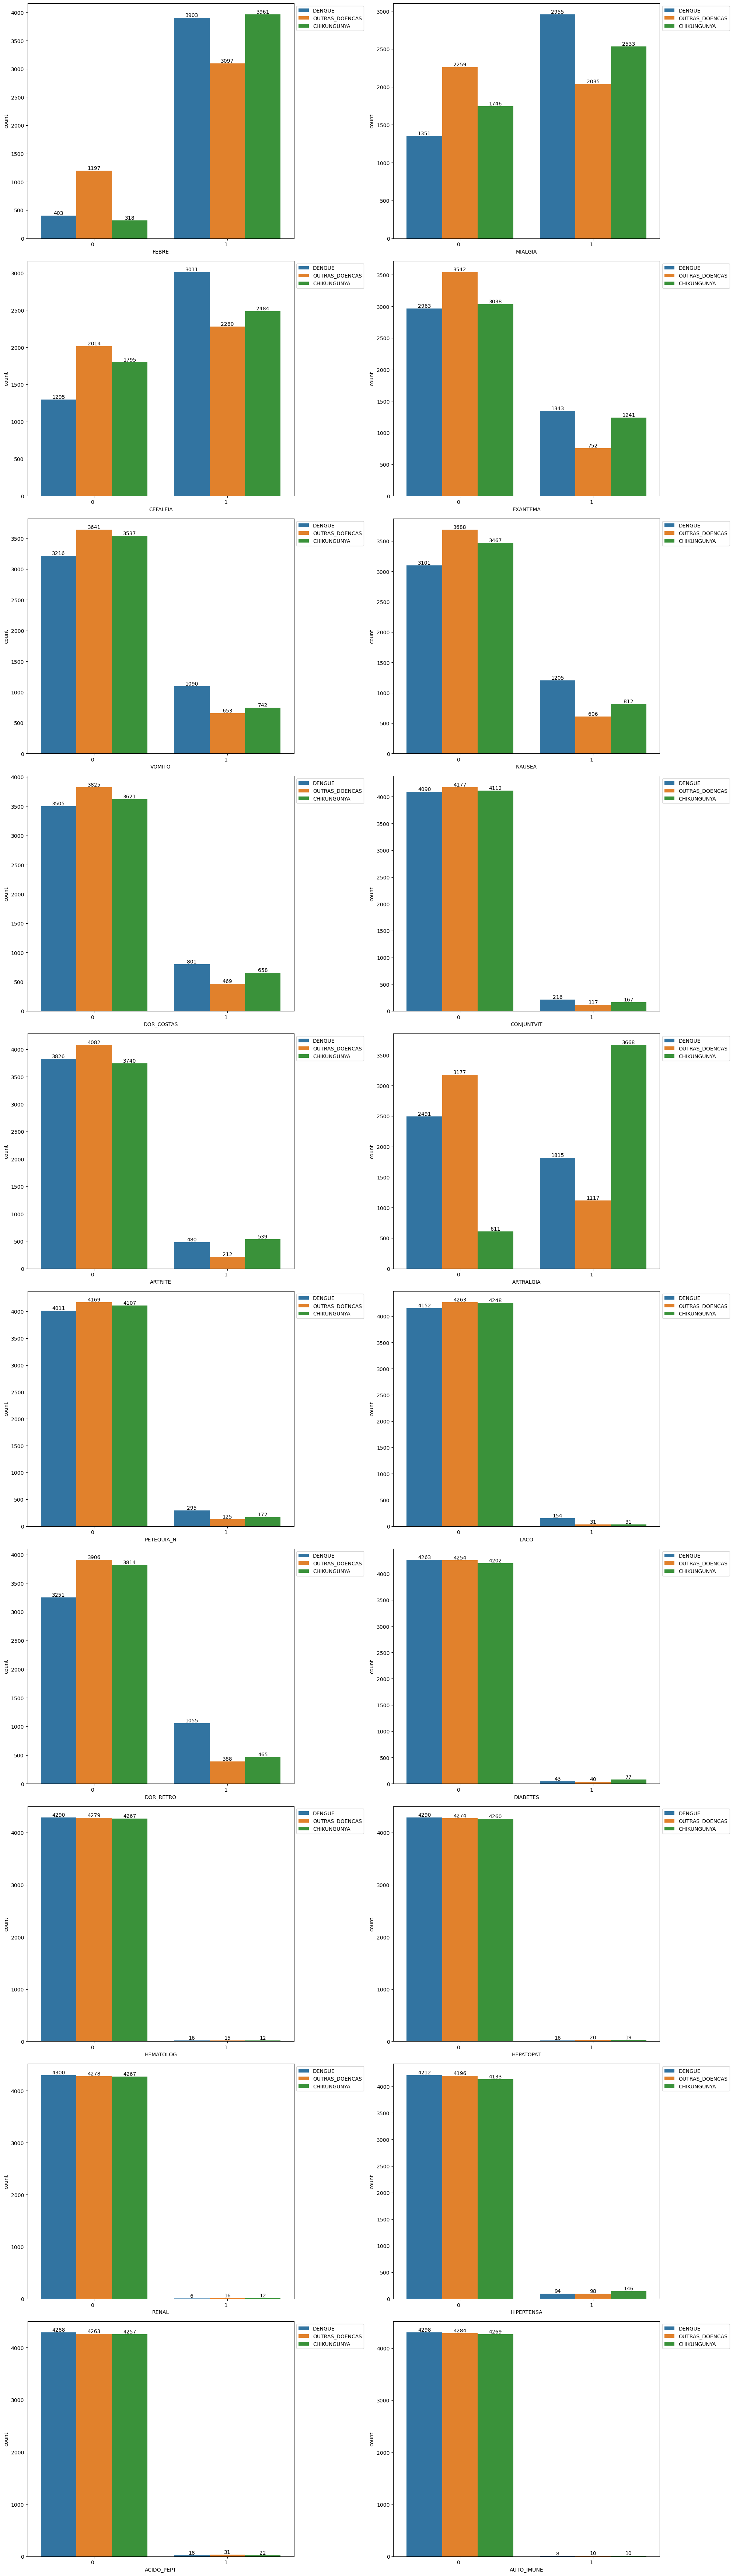

In [75]:
#COLUNAS DE SINTOMAS E DOENÇAS

plt.figure(figsize=(20,70))

for i, col in enumerate(cols_sintomas):
    ax=plt.subplot(10,2 , i+1)
    sns.countplot(data=df_train, x=col, hue='CLASSI_FIN')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
    for label in ax.containers:
        ax.bar_label(label)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout() 

- As doenças pré-existentes não parecem influenciar na classificação.
- Alguns sintomas, como petéquia, fragilidade dos capilares e conjuntivite, também não parecem influenciar. 

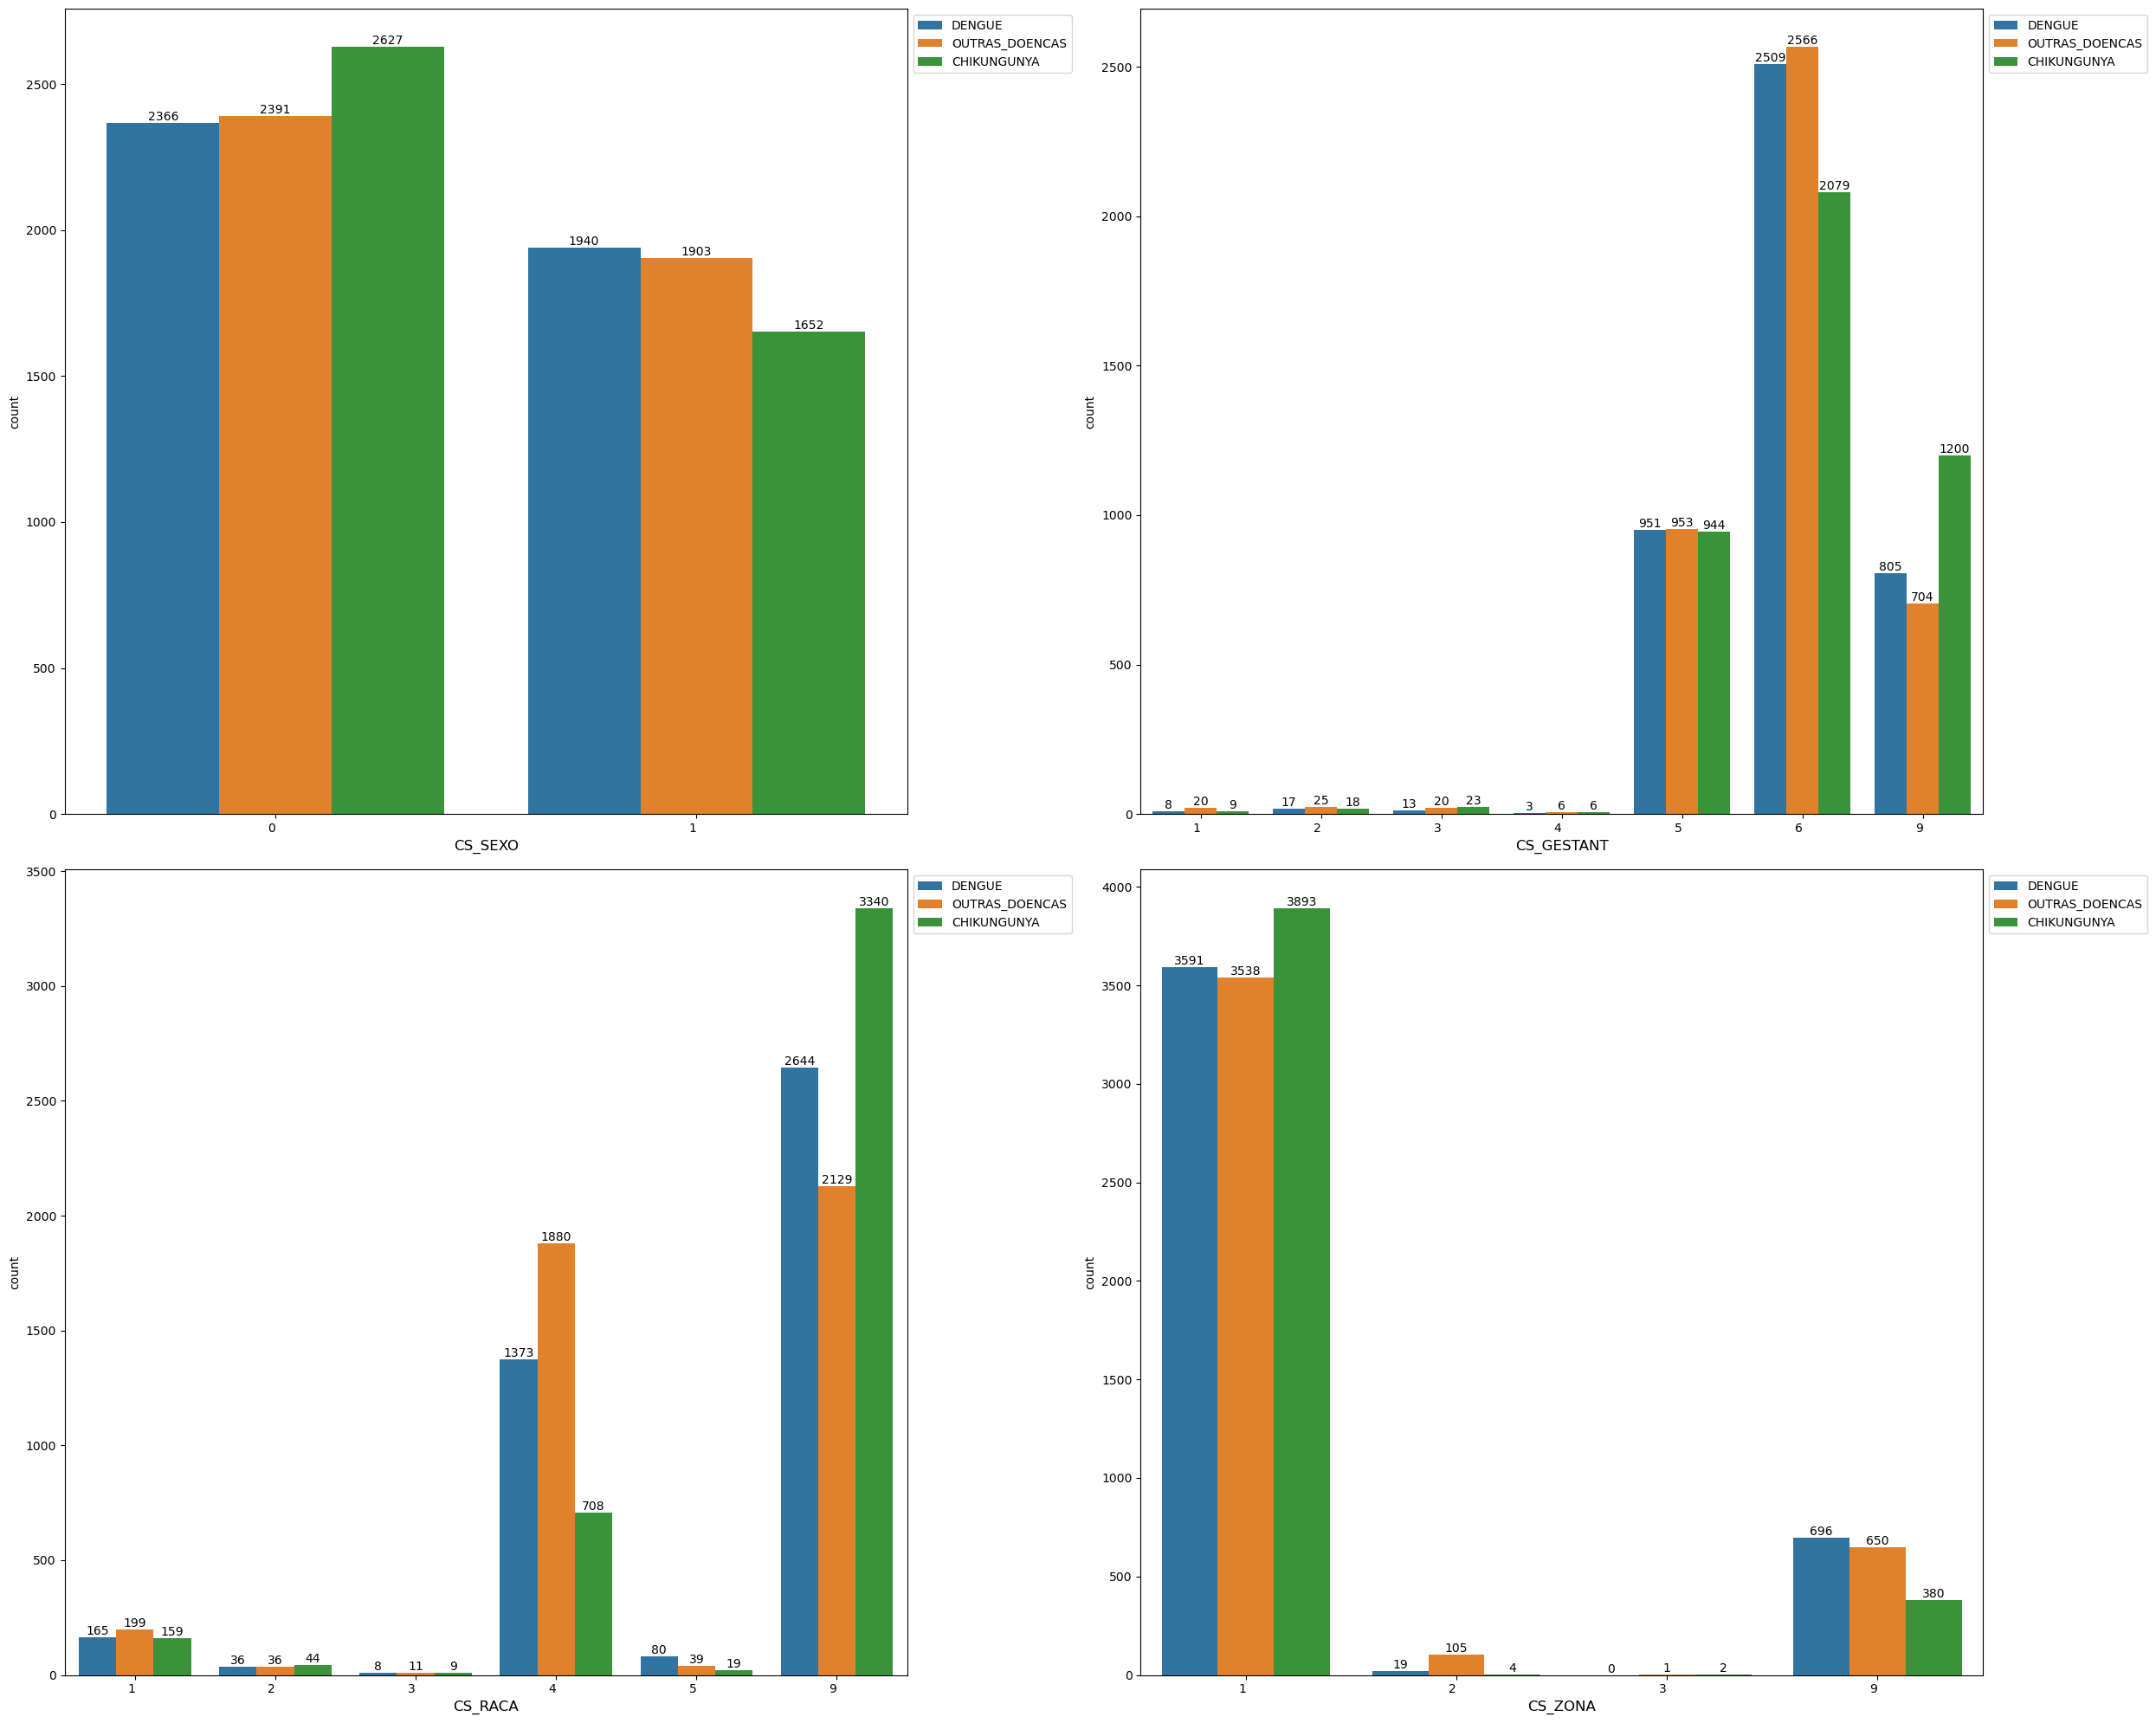

In [76]:
#COLUNAS DE INFORMAÇÕES DO PACIENTE

cols_paciente = ['CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ZONA']

plt.figure(figsize=(25,20))

for i, col in enumerate(cols_paciente):
    ax=plt.subplot(2,2 , i+1)
    sns.countplot(data=df_train, x=col, hue='CLASSI_FIN')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
    for label in ax.containers:
        ax.bar_label(label)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xlabel(col, size='large')
    plt.tight_layout() 

- A maioria dos pacientes não está grávida (5), não se aplica (6) ou é ignorado (9). Não parece ser importante para o diagnóstico.
- A maioria dos pacientes não informou a raça (9). 
- A maioria vive em zona urbana e a proporção das 3 classificações não é muito diferente.

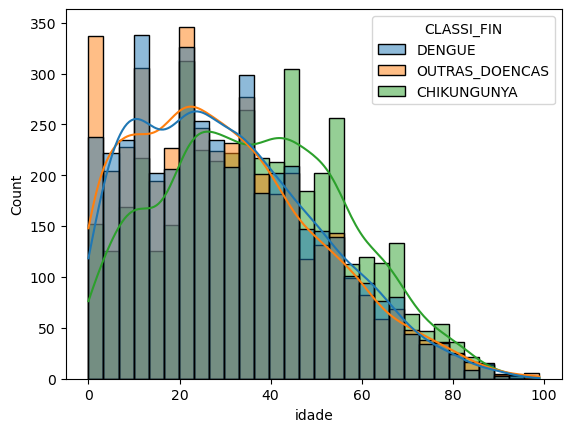

In [77]:
df_train['idade'] = df_train['idade'].astype('int64')

sns.histplot(data=df_train, x='idade', bins=30, kde=True, hue='CLASSI_FIN')
plt.show()

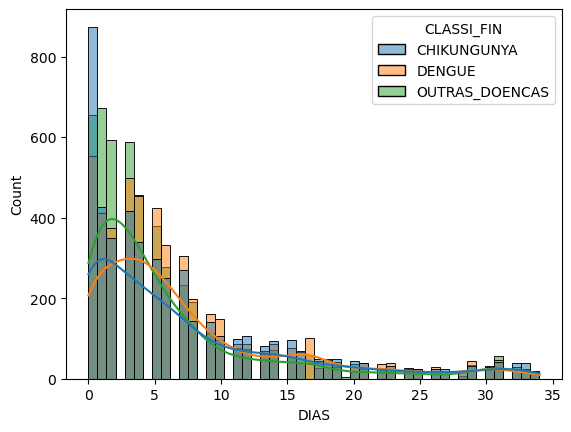

In [28]:
sns.histplot(data=df_dias, x='DIAS', bins=50, kde=True, hue='CLASSI_FIN')
plt.show()

- `DIAS` e `idade` também não parecem ser importantes para a classificação, mesmo após tratamento e retirada de outliers. 

#### 5. MODELAGEM <a name="modelagem"></a>

A escolha das variáveis explicativas foi baseada na análise descritiva. 

In [78]:
cols_modelo = ['CS_SEXO', 'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 
               'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'ARTRITE', 'ARTRALGIA',
               'DOR_RETRO', 'CLASSI_FIN']

In [79]:
#replicando tratamentos da base de treino na base de teste

#trocando o 1 e 2 por 0 (não tem o sintoma/doença) e 1 (apresenta o sintoma/doença)
for col in cols_sintomas:
    df_test[col] = df_test[col].map({1.0: 1, 2.0: 0})
    

#trocando variáveis para int64
df_test[cols_tipo] = df_test[cols_tipo].astype('int64')


#ajustando valores que não existem na legenda
df_test['CS_SEXO'] = df_test['CS_SEXO'].map({1:1, 0:0, 2:0})
df_test['CS_SEXO'].value_counts()

df_test['CS_GESTANT'] = df_test['CS_GESTANT'].map({1:1, 0:6, 2:2, 3:3, 4:4, 5:5, 6:6, 9:9})
df_test['CS_GESTANT'].value_counts()

df_test['CS_RACA'] = df_test['CS_RACA'].map({1:1, 0:9, 2:2, 3:3, 4:4, 5:5, 9:9})
df_test['CS_RACA'].value_counts()


#filtrar idade
df_test['NU_IDADE_N'] = df_test['NU_IDADE_N'].astype('str') #mudando tipo para filtrar 
df_test[['tipo', 'idade']] = df_test.apply(lambda row: extrair_idade(row), axis=1, result_type="expand") #aplicando função

#passando idades dos tipos 1, 2 e 3 para 0, pois esses pacientes têm menos de 1 ano e assim a coluna 'idade' fica padronizada em anos
df_test.loc[df_test['tipo'] != '4', 'idade'] = '0'

In [80]:
df_test.head()

NU_IDADE_N  CS_SEXO  CS_GESTANT  CS_RACA  CS_ZONA  FEBRE  MIALGIA  CEFALEIA  \
0       4042        1           6        4        9      1        1         1   
1       4011        1           6        4        1      1        0         0   
2       4037        0           5        9        1      1        1         1   
3       4035        1           6        9        9      1        1         1   
4       4031        0           9        9        1      1        1         1   

   EXANTEMA  VOMITO  ...  HEMATOLOG  HEPATOPAT  RENAL  HIPERTENSA  ACIDO_PEPT  \
0         0       0  ...          0          0      0           0           0   
1         0       0  ...          0          0      0           0           0   
2         0       0  ...          0          0      0           0           0   
3         0       0  ...          0          0      0           0           0   
4         0       0  ...          0          0      0           0           0   

   AUTO_IMUNE  DIAS      CLASSI_FIN  tipo  idade  
0           0     1     CHIKUNGUNYA     4     42  
1           0     5     CHIKUNGUNYA     4     11  
2           0     0     CHIKUNGUNYA     4     37  
3           0     0  OUTRAS_DOENCAS     4     35  
4           0    12  OUTRAS_DOENCAS     4     31  

[5 rows x 29 columns]

#### 5.1 ÁRVORE DE DECISÃO <a name="arvore"></a>

In [81]:
#separar variável resposta das explicativas

X_train = df_train[cols_modelo].drop(columns='CLASSI_FIN', axis=1)
y_train = df_train['CLASSI_FIN']

X_test = df_test[cols_modelo].drop(columns='CLASSI_FIN', axis=1)
y_test = df_test['CLASSI_FIN']

print(f'''
X_train shape: {X_train.shape}
y_train shape: {y_train.shape}
X_test shape: {X_test.shape}
y_test shape: {y_test.shape}''')


X_train shape: (12879, 11)
y_train shape: (12879,)
X_test shape: (4293, 11)
y_test shape: (4293,)


In [82]:
clf = tree.DecisionTreeClassifier(random_state=100) #cria árvore
path = clf.cost_complexity_pruning_path(X_train, y_train) #treina sem limite de profundidade e complexidade
ccp_alphas, impurities = path.ccp_alphas, path.impurities #salva ccp_alphas para pós poda

In [83]:
%%time
#pós poda

clfs = [] #cria lista vazia
for ccp_alpha in ccp_alphas: 
    clf = tree.DecisionTreeClassifier(random_state=100, ccp_alpha=ccp_alpha).fit(X_train, y_train) #obter árvores derivadas e menos complexas a partir de cada ccp_alpha
    clfs.append(clf) #guardar cada árvore na lista criada 

CPU times: user 6.22 s, sys: 46.1 ms, total: 6.26 s
Wall time: 6.32 s


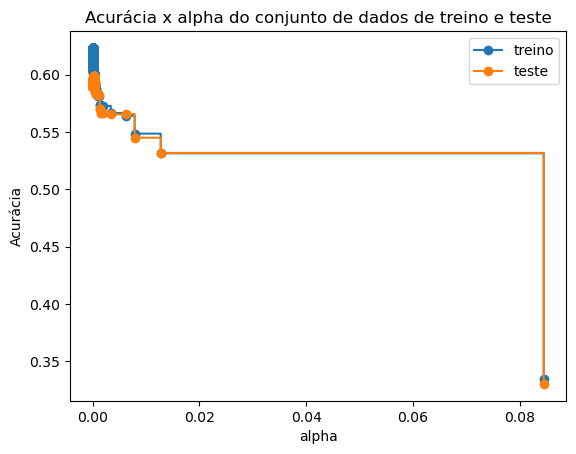

In [84]:
#para cada poda indicada pelo ccp, plota a métrica de desempenho da árvore na base de treino e teste

train_scores = [clf.score(X_train, y_train) for clf in clfs] #score de cada árvore da lista na base de treino
test_scores  = [clf.score(X_test, y_test)   for clf in clfs] #score de cada árvore da lista na base de teste

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [85]:
#maior métrica de desempenho no objeto test_scores, mas se houver empates, a de menor complexidade

ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]
melhor_arvore

DecisionTreeClassifier(ccp_alpha=0.0001476981020847347, random_state=100)

In [87]:
#plotar árvore
plt.figure(figsize=(20, 20), dpi=600)

tree.plot_tree(melhor_arvore,
               class_names=melhor_arvore.classes_,
               feature_names=X_train.columns,
               filled=True);

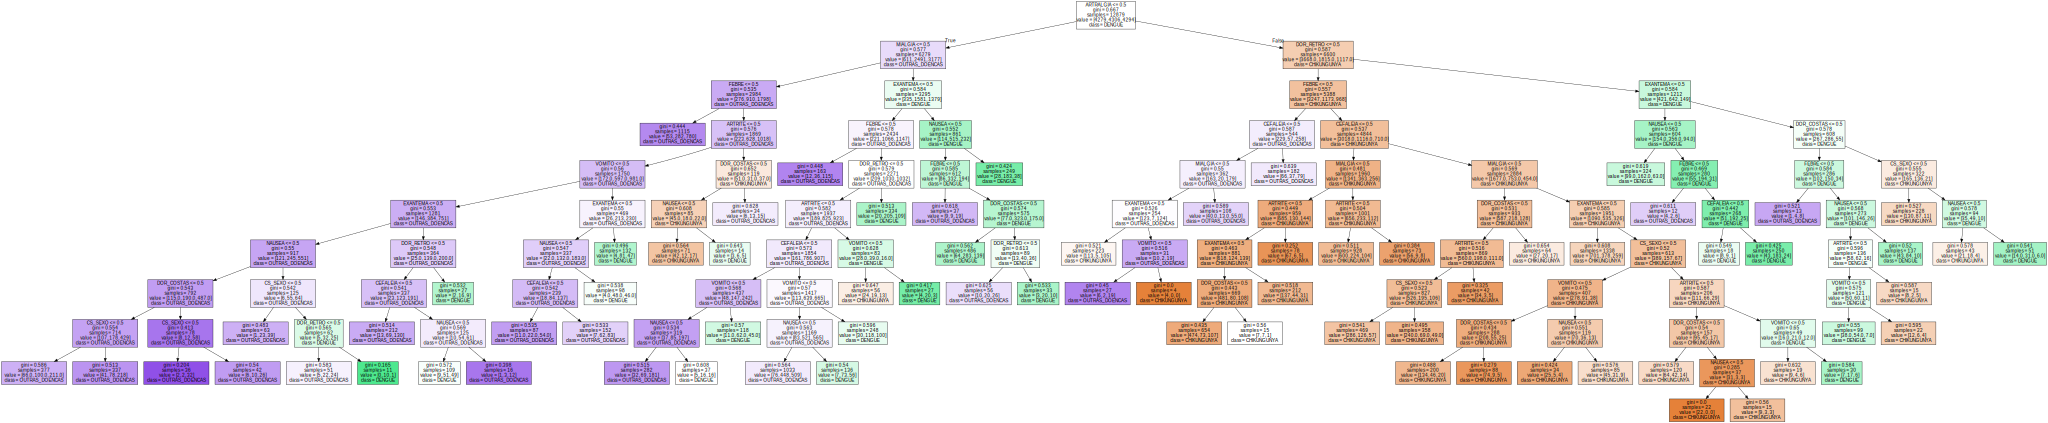

In [88]:
#melhor visualização da árvore utilizando graphviz
# data
dot_data = export_graphviz(melhor_arvore, out_file=None, 
                                          feature_names=X_train.columns,  
                                          class_names=melhor_arvore.classes_,
                                          filled=True)

# desenha o gráfico
graph = graphviz.Source(dot_data, format="png") 
graph

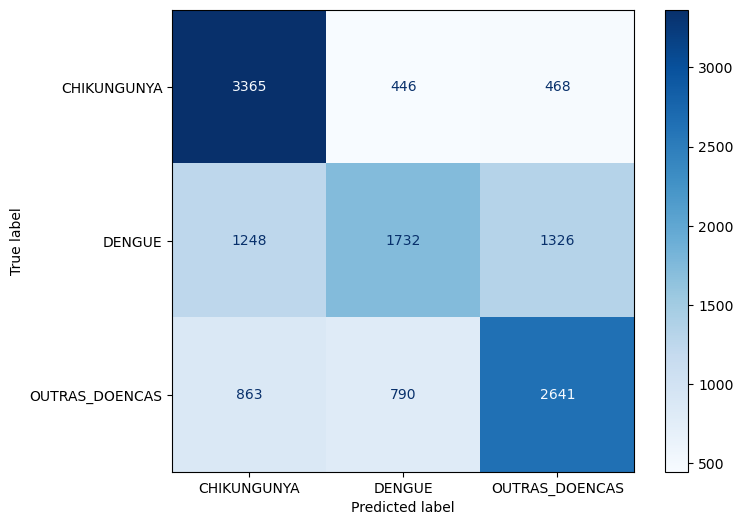

In [89]:
#previsão do modelo com base de treino
predict_train = melhor_arvore.predict(X_train)

#matriz de confusão com dados observados e preditos 
mc_train = confusion_matrix(y_true=y_train, y_pred=predict_train)

#plotar matriz de confusão
mc_train_plot = ConfusionMatrixDisplay(confusion_matrix=mc_train, display_labels=melhor_arvore.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
mc_train_plot.plot(ax=ax, cmap='Blues')
plt.show()

In [90]:
acc_train = accuracy_score(y_train, predict_train)

print(f'A acurácia de treino é {round(acc_train, 2)}')

A acurácia de treino é 0.6


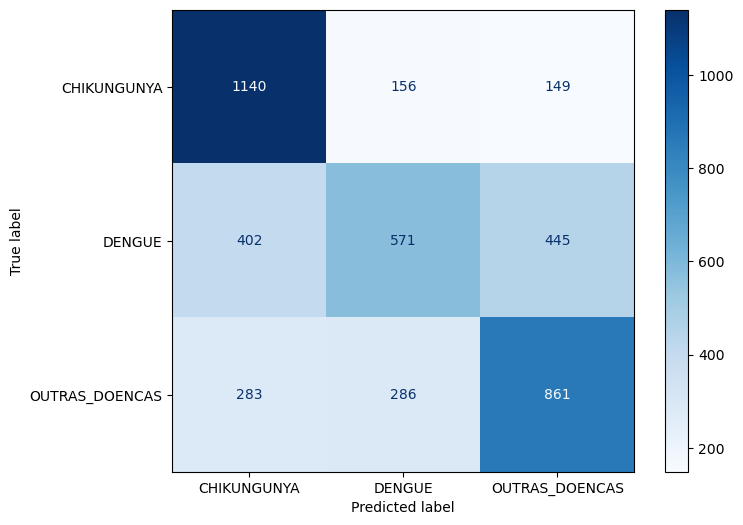

In [91]:
#mesma análise na base de teste

#previsão do modelo com base de teste
predict_test = melhor_arvore.predict(X_test)

#matriz de confusão com dados observados e preditos 
mc_test = confusion_matrix(y_true=y_test, y_pred=predict_test)

#plotar matriz de confusão
mc_test_plot = ConfusionMatrixDisplay(confusion_matrix=mc_test, display_labels=melhor_arvore.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
mc_test_plot.plot(ax=ax, cmap='Blues')
plt.show()

In [92]:
acc_test = accuracy_score(y_test, predict_test)

print(f'A acurácia de teste é {round(acc_test, 2)}')

A acurácia de teste é 0.6


> Em relação à Chikungunya e outras doenças a árvore parece distinguir razoavelmente bem. Contudo, ainda erra bastante em relação à dengue. <br>
> Os sintomas parecidos em relação à dengue e chikungunya podem atrapalhar a diferenciação. 

#### 5.2 REGRESSÃO LOGÍSTICA <a name="reglog"></a>

In [106]:
#criar e fitar a regressão com os dados de treino
rl = LogisticRegression(multi_class='multinomial', solver='lbfgs')
rl.fit(X_train, y_train)


LogisticRegression(multi_class='multinomial')

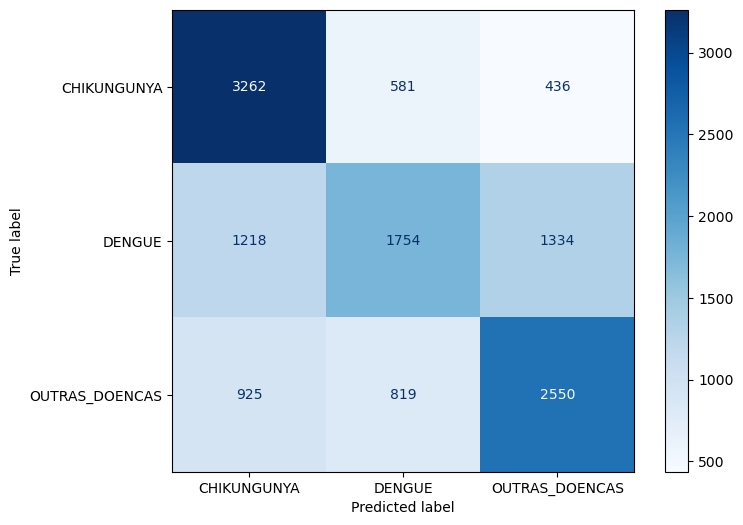

In [107]:
#previsão do modelo com base de treino
predict_rl_train = rl.predict(X_train)

#matriz de confusão com dados observados e preditos 
mc_rl_train = confusion_matrix(y_true=y_train, y_pred=predict_rl_train)

#plotar matriz de confusão
mc_rl_train_plot = ConfusionMatrixDisplay(confusion_matrix=mc_rl_train, display_labels=rl.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
mc_rl_train_plot.plot(ax=ax, cmap='Blues')
plt.show()

In [108]:
acc_rl_train = accuracy_score(y_train, predict_rl_train)

print(f'A acurácia de treino é {round(acc_rl_train, 2)}')

A acurácia de treino é 0.59


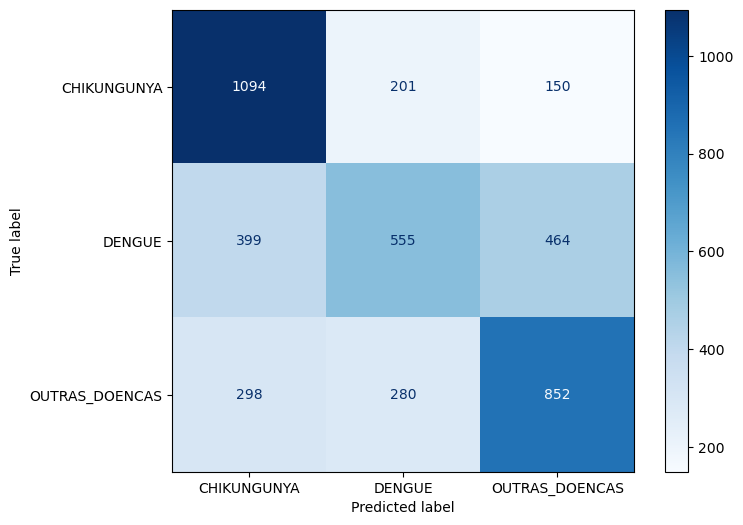

In [109]:
#mesma análise na base de teste

#previsão do modelo com base de teste
predict_rl_test = rl.predict(X_test)

#matriz de confusão com dados observados e preditos 
mc_rl_test = confusion_matrix(y_true=y_test, y_pred=predict_rl_test)

#plotar matriz de confusão
mc_rl_test_plot = ConfusionMatrixDisplay(confusion_matrix=mc_rl_test, display_labels=rl.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
mc_rl_test_plot.plot(ax=ax, cmap='Blues')
plt.show()

In [110]:
acc_rl_test = accuracy_score(y_test, predict_rl_test)

print(f'A acurácia de teste é {round(acc_rl_test, 2)}')

A acurácia de teste é 0.58


> A regressão logística tem uma performance bem parecida com a árvore de decisão.

#### 6. CONCLUSÃO  <a name="conclusao"></a>

- Os modelos de árvore de decisão e regressão logística apresentaram performance parecida ao tentar classificar os dados.
- Ambos foram capazes de classificar chikungunya e outras doenças de forma razoavelmente bem, porém não foram eficientes em classificar pacientes com dengue.
- A dificuldade de classificação pode ser devido à similaridade dos sintomas ou aos dados propriamente ditos; talvez com uma base maior e mais variada (de outras regiões do Brasil ou abrangendo outros anos, por exemplo) os modelos possam ser aperfeiçoados. 